# Teoria de sinais

# Series de Fourier


## Base Ortonormal

Um conjunto de vetores {$e_i$} de um espaço vetorial $\mathbb{V}$ se denomina **base** se todo elemento $\mathbf{v}$ de $\mathbb{V}$ pode ser escrito como uma combinação linear dos elementos da base, ou seja

\begin{equation}  \mathbf{v}=\sum_j c_j e_j \end{equation}

Uma base se denomina ortonormal se seus elementos satisfazem a seguinte propriedade 

\begin{equation}  <e_j|e_k> = \delta_{jk} \end{equation}

onde $< | >$ representa o produto interno, o qual deve satisfazer certas propriedades. Se uma base é ortonormal, é facil calcular os coeficientes $c_j$ como
 
\begin{equation}  c_j = <e_j|\mathbf{v}> \end{equation}

## Base ortonormal para funções de periodo finito

No caso de funções $ f(x): \mathbb{R} \to \mathbb{C} $ que são periódicas, ou seja, que elas se repetem ao longo do dominio com um certo periodo $2\Gamma$, pode ser definida uma base que representa todas estas funções. Um elemento desta base esta definido como

\begin{equation}  e_k = \frac{1}{\sqrt{2\Gamma}}\exp\left(i\frac{\pi}{\Gamma} k x\right)\end{equation}

Nesse caso o produto interno é entre duas funções (vetores) é definido como

\begin{equation}  < f_1|f_2 > = \int_{-\Gamma}^{\Gamma}f_1(x)^{*} f_2(x) dx \end{equation}

Onde o $*$ representa a operação de complexo conjugado. É facil provar que com essa definição, a base anteriormente definida é ortogonal se e somente se o indice k é um numero inteiro.

## Definição de Serie de Fourier

Seja uma função periódica $f(x)$ com periodo $2\Gamma$. Se denomina **Serie de Fourier** da função f à seguinte expressão

\begin{equation} f(x)= \sum_{k=-\infty}^{\infty} c_k \exp\left(i\frac{\pi}{\Gamma} k x\right)\end{equation}

Onde o coeficiente $c_k$ esta dado por

\begin{equation} c_k = < e_k|f > = \frac{1}{2\Gamma}\int_{-\Gamma}^{\Gamma}\exp\left(-i\frac{\pi}{\Gamma} k x\right)f(x) dx \end{equation}

Observe-se que o indice k vai aumentado a frequência de oscilação da função base. Portanto, pode-se interpretar o $c_k$ como a contribuição de amplitude da frequência determinada pelo índice k.

# Transformada de Fourier

## Definição

Observe-se que se a função tiver um periodo finito, uma base discreta seria suficiente para descrever a função atraves da serie de Fourier. No caso do periodo ser infinito, ou seja uma função que não possui periodicidade então a base deve ser continua e a contribuição de cada frequência do espectro continuo é calculada através da **transformada de Fourier**. Para uma função $f(x)$, a transformada de Fourier $F(\omega)$ é definida como

\begin{equation} F(\omega) = \int_{-\infty}^{\infty}f(x)\exp(-i\omega x)dx\end{equation}

Também pode ser definida a transformada inversa como 

\begin{equation} f(x) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F(\omega)\exp(i\omega x)d\omega\end{equation}

## Algumas propriedades

### Transforma de uma função real

Se $f(x)$ possui valores reais então a transformada de Fourier satisfaz a seguinte relação

\begin{equation}
    F(-\omega)=F^{*}(\omega)
\end{equation}

# Teorema de Shannon

O teorema de Shannon o teorema da amostragem é um dos teoremas mais importantes na análise de sinais.

## Formulação 

Seja f(t) uma função **banda limitada**, ou seja que possui contribuição de frequência angular até certa frequência angular limite $\Omega$. 

\begin{equation}
F(\omega)= \left\{
  \begin{array}{lr} 
      F(\omega) &  |\omega|\leq \Omega \\
      0 & |\omega| > \Omega 
      \end{array}
\right.
\end{equation}


Então essa função pode ser descrita pela seguinte expressão

\begin{equation}
    f(t)=\sum_{k=-\infty}^{\infty} f\left(k \Delta t \right) sinc\left(\frac{t}{\Delta t}  -k\right)
\end{equation}

onde a $\Delta t =\frac{\pi}{\Omega}$ e a função sinc é definida como



\begin{equation}
sinc(t)= \left\{
  \begin{array}{lr} 
      \frac{\sin(\pi t)}{\pi t} & t\neq 0 \\
      1 & t = 0 
      \end{array}
\right.
\end{equation}

O que diz este teorema é que se uma função for banda limitado então para descrever completamente ela é preciso fazer uma amostragem coletando amostras com uma amostragem $\Delta t$

Otra forma de entender a quantidade $\Delta t $ é escrevendo ela em termos da frequencia ao invés da frequência angular. Lembrando que $\Omega = 2\pi f_{max}$ onde $f_{max}$ é a frequência máxima do dado então

\begin{equation}\Delta t =\frac{1}{2 f_{max}} \end{equation}
Esse teorema pode ser entendido de duas formas:


1. Se eu tenho um sinal que sei que é banda limitada então para amostrar esse sinal eu devo usar uma amostragem cujo intervalo deve ser no máximo $\Delta t =\frac{1}{2 f_{max}}$

2. Dado um determinado $\Delta t$ (Por exemplo meu equipamento de medida possui essa taxa de amostragem) então eu só posso amostrar sinais com conteudo de frequência máximo dado por $f_{max} =\frac{1}{2 \Delta t }=\frac{f_{amos}}{2}$

A quantidade $f_{max}$ é conhecida como **frequência de Nyquist**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt=0.02
amostras=50
fny=1/(2*dt)
print('A frequencia de Nyquist é',fny,'Hz')

A frequencia de Nyquist é 25.0 Hz


In [3]:
t=np.arange(0,amostras*dt,dt)

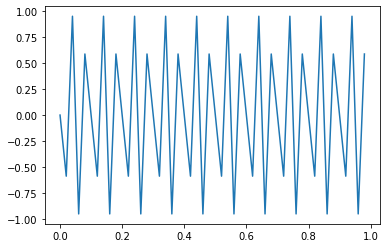

In [4]:
f=30
plt.plot(t,np.sin(2*np.pi*f*t))

A frequência alias é 45.0 Hz


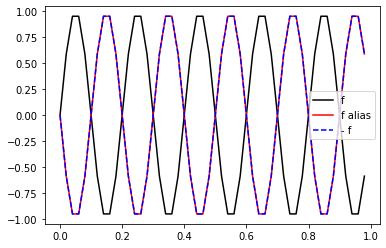

In [5]:
f=5
plt.plot(t,np.sin(2*np.pi*f*t),'k',label='f')
f1=fny+np.abs(f-fny)
plt.plot(t,np.sin(2*np.pi*f1*t),'r',label='f alias')
f2=-f
plt.plot(t,np.sin(2*np.pi*f2*t),'--b',label='- f')
plt.legend()
print('A frequência alias é',f1,'Hz')

In [6]:
# definição da interpolação sinc. Este algoritmo é explicado mais na frente
def sincint(y,dt,dtp):
    ffty=np.fft.rfft(y)
    nf=int(round(y.size*dt/dtp))
    yp=np.zeros(nf//2+1,dtype=complex)
    yp[0:ffty.size]=ffty
    yp=np.fft.irfft(yp,nf)
    return (dt/dtp)*yp

In [7]:
f=5

In [8]:
#Definição do sinal 1
dt=0.02
amostras=50
t=np.arange(0,amostras*dt,dt)
sinal=np.sin(2*np.pi*f*t)

In [9]:
#Definição do sinal 2
dt1=0.005
amostras1=200
t1=np.arange(0,amostras1*dt1,dt1)
sinal1=np.sin(2*np.pi*f*t1)

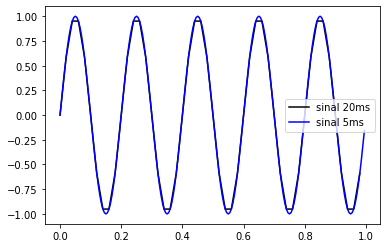

In [10]:
plt.plot(t,sinal,'k',label='sinal 20ms')
plt.plot(t1,sinal1,'b',label='sinal 5ms')
plt.legend()

In [11]:
#Interpolação
sinalint=sincint(sinal,dt,dt1)

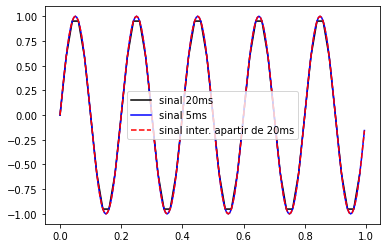

In [12]:
#comparação de sinais
plt.plot(t,sinal,'k',label='sinal 20ms')
plt.plot(t1,sinal1,'b',label='sinal 5ms')
plt.plot(t1,sinalint,'--r',label='sinal inter. apartir de 20ms')
plt.legend()

# Transformada discreta de Fourier (DFT)

## Definição

Sejam $f_j \in \mathbb{C}$ com $j$ sendo um índice de um vetor de $N$ componentes, ou seja, $j=0,1,...,N-1$ e $W_{N}=\exp(2\pi i /N)$.  A **Transformada Discreta de Fourier** $F_k$ com $k=0,1,...,N-1$ é dada por:

\begin{equation}
 F_k=\sum_{j=0}^{N-1}f_j W_N^{-jk}
\end{equation}

Sendo a transformada inversa dada por

\begin{equation}
 f_j=\sum_{k=0}^{N-1}F_k W_N^{jk}
\end{equation}

Em resumo a transformada de Fourier de um vetor de N componentes é um outro vetor complexo de N componentes.

O custo computacional de calcular a DFT usando a definição é da ordem de $N^2$ o qual é muito caro. Isto levou aos matemáticos a inventarem a conhecida **Transformada Rápida de Fourier** ou **FFT** a qual tem um custo computacional da ordem de $N \log (N)$ que é muito mais barato que a DFT.

## Que frequencias representa a DFT?

Seja um vetor $x[i]$ que representa um sinal amostrado. Vamos supor que esse sinal foi amostrado com $N$ amostras com um intervalo de amostragem $\Delta t$. Quando é feita a DFT desse sinal num computador, podemos perguntar: *que frequencias representam essa transformada?*

A resposta esta no teorema de Shannon. Devido a que a amostragem é discreta, então pelo teorema de Shannon, o sinal somente pode possuir frequencias até a frequência Nyquist, ou seja, até $f_{ny}=1/2\Delta t$. Esto implica que a DFT somente poderia identificar frequências até a $f_{ny}$.

Como a transformada de Fourier é calculada para frequências positivas e negativas, então a DFT é calculada para frequências entre $-f_{ny}$ e $f_{ny}$. Como a saida da DFT é um vetor de N componentes então o intervalo de amostragem no domínio da frequência $df$ é calculado como

\begin{equation}
\Delta f=\frac{(f{ny}-(-f_{ny}))}{N}=\frac{2f_{ny}}{N}=\frac{1}{N\Delta t}
\end{equation}

Observe-se que a amostragem no domínio da frequência depende do tempo do sinal. Entre mais tempo menor amostragem. É análogo à frequência de nyquist a qual é o inverso da amostragem temporal. Isto é por causa do *principio de incerteza* da transformada de Fourier. 

Por convenção o resultado da DFT esta organizado da seguinte forma: primero esta o espectro das frequências positivas e depois das frequências negativas. Em python as frequências que representam a DFT são calculadas com a função np.fft.fftfreq.

Vamos ver um exemplo...

In [13]:
def ricker(fp,dt,amostras):
    t0=6/(np.pi*fp*np.sqrt(2))
    tricker=np.arange(0,dt*(amostras),dt)
    rickeramp=(1-2*np.pi**2*fp**2*(tricker-t0)**2)*np.exp(-np.pi**2*fp**2*(tricker-t0)**2)
    return rickeramp

In [14]:
dt=0.002
amostras=500
freq=np.fft.fftfreq(amostras,dt) # definindo o dominio da frequência
tempo=dt*amostras
tempo
df=1/tempo
fny=1/(2*dt)
print(tempo,df)
print(fny,dt)

1.0 1.0
250.0 0.002


In [15]:
dt=0.005
amostras=200
freq=np.fft.fftfreq(amostras,dt) # definindo o dominio da frequência
tempo=dt*amostras
tempo
df=1/tempo
fny=1/(2*dt)
print(tempo,df)
print(fny,dt)

1.0 1.0
100.0 0.005


## Domínio da frequencia

Por convenção da transformada de Fourier discreta (DFT), ela esta organizada de tal forma que a primeira entrada do vetor corresponde com a frequência zero, a primeira metade do vetor corresponde com as frequências positivas e o segunda metade com as frequências negativas. O dominio da frequencia em python é calculado com a função np.fft.fftfreq

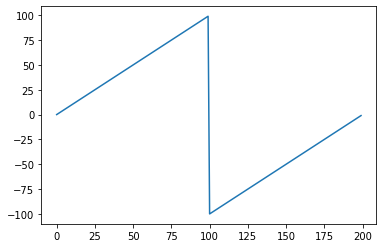

In [16]:
#visualizando a organização do domínio da frequência
plt.plot(freq)

In [17]:
#agora calculamos a DFT de uma ricker
f=10
rick=ricker(f,dt,amostras)
fftricker=np.fft.fft(rick)

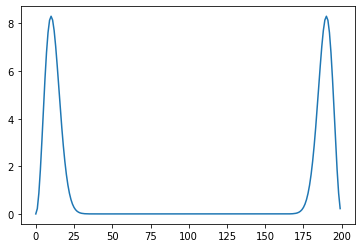

In [18]:
#fazendo um plot do espectro (valor absoluto da DFT)
plt.plot(np.abs(fftricker))

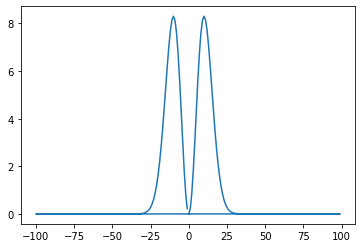

In [19]:
#Fazendo um plot com o dominio
plt.plot(freq,np.abs(fftricker))

A função *np.fft.fftshift* troca a ordem do dominio da frequência e do vetor de transformada de Fourier de tal forma que fique na ordem convencional

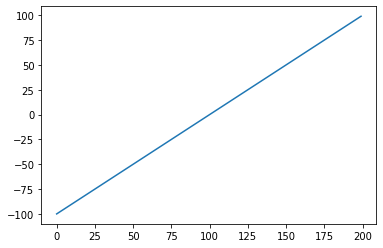

In [20]:
plt.plot(np.fft.fftshift(freq))

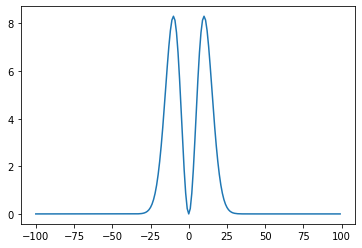

In [21]:
plt.plot(np.fft.fftshift(freq),np.abs(np.fft.fftshift(fftricker)))

## Transformada de uma função real

Como vimos anteriormente a transformada de Fourier de uma função real satisfaz a propriedade $ F(-\omega)=F^{*}(\omega)$. Isto implica que não seria necessário calcular a DFT das frequências negativas esta poderia ser obtida apartir da DFT das frequncias positivas. Portanto quando o sinal possui somente valores reais pode ser feita uma otra transformada que pode ser ainda mais rápida que a FFT. Em python essa transformada se chama de rfft (r de real). Como somente inclui as frequências positivas o vetor da RFFT somente possui $\frac{N}{2}+1$ componentes. A definição do domínio da frequência é feita com a ferramenta rfftfreq.

200 101


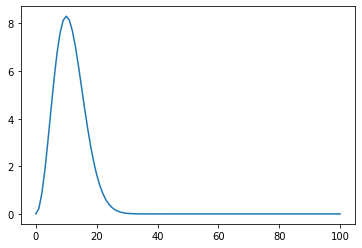

In [22]:
rfreq=np.fft.rfftfreq(amostras,dt)
rfftricker=np.fft.rfft(rick)
print(rick.size,rfftricker.size)
plt.plot(rfreq,np.abs(rfftricker))

## Interpolação Sinc

Além de fornecer um criterio de amostragem com relação à frequência máxima do sinal, o teorema de Shannon fornece uma fórmula para interpolar uma função que seja banda limitada. Uma forma seria aplicar diretamente a fórmula fornecida pelo teorema de Shannon

\begin{equation}
    f(t)=\sum_{k=-\infty}^{\infty} f\left(k \Delta t \right) sinc\left(\frac{t}{\Delta t}  -k\right)
\end{equation}

Porém, essa fórmula é cara computacionalmente devido a que o custo computacional é da ordem de $N_e*N_s$ sendo $N_e$ o número de amostras do vetor de entrada e $N_s$ o número de amostras de saida , sendo que $N_s \geq N_e$ . Uma forma de usar a fórmula de interpolação do teorema de Shannon é aplicando um equivalente desta no domínio da frequência. Esta interpolação é feita nos seguintes passos:

1. Aplicar a DFT real do vetor de entrada. A saida deste vetor possui $\frac{N_e}{2}+1$ amostras.
2. A transformada de Fourier do vetor de saida interpolado deve ter $\frac{N_s}{2}+1$. Portanto, é alocado um vetor de zeros com este número de amostras representando a DFT do dado de saida.
3. Nas primeiras $\frac{N_e}{2}+1$ amostras da DFT do dado de saida são colocadas as amostras da DFT do vetor de entrada.
4. É feita a DFT inversa deste último vetor.
5. Este vetor de saida é escalado pelo fator $\frac{N_s}{N_e}$.

# Relação com a modelagem

Até agora nessa aula falamos sobre a relação da amostragem $\Delta t$ com que um aparelho amostra um sinal com o conteudo de frequencia do proprio sinal, isto através do teorema de Shannon. Por outro lado, na aula de modelagem vimos que existe um $\Delta t_p$ relacionado com a propagação. Devido a que o conteudo de frequências é relativamente baixo, o $\Delta t$ com que é amostrado um sinal propagado pode ser grande. Porém, por causa do criterio CFL de estabilidade numérica o $\Delta t_p$ deve ser pequeno e isto faz com que o sinal de uma propagação  seja amostrado demais.

Para conciliar o $\Delta t$ de amostragem e o $\Delta t_p$ de propagação, a função de propagação é modificada para que o usuario forneça o $\Delta t$ desejado (Que satisfaça o teorema de Shannon) e o programa automaticamente procure um $\Delta t_p$ que tal que $\Delta t = N \Delta t_p$, onde $N$ é um número inteiro. O valor de $N$ deve ser o mínimo para que o $\Delta t_p$ satisfaça a condição CFL.

In [23]:
#Definição de funções de propagação

import numpy as np
import matplotlib.pyplot as plt
import time

#Wavelet de ricker
def ricker(fp,dt,amostras):
    t0=6/(np.pi*fp*np.sqrt(2))
    tricker=np.arange(0,dt*(amostras),dt)
    rickeramp=(1-2*np.pi**2*fp**2*(tricker-t0)**2)*np.exp(-np.pi**2*fp**2*(tricker-t0)**2)
    return rickeramp

#interpolação sinc (Ver a descrição desse algoritmo acima na seção "Interpolação Sinc")
def sincint(y,dt,dtp):
    ffty=np.fft.rfft(y)#passo 1
    nf=int(round(y.size*dt/dtp))
    yp=np.zeros(nf//2+1,dtype=complex)#passo 2
    yp[0:ffty.size]=ffty#passo 3
    yp=np.fft.irfft(yp,nf)#passo 4
    return (dt/dtp)*yp#passo 5

#estender modelo
def estendermodelo(vel,borda):
    (nz,nx)=np.shape(vel)
    nxa=nx+2*borda
    nza=nz+2*borda
    modelo=np.zeros((nza,nxa))
    modelo[borda:borda+nz,borda:borda+nx]=vel
    recheio=vel[:,0];
    for i in range(0,borda):
        modelo[borda:borda+nz,i]=recheio
    recheio=vel[:,nx-1]
    for i in range(borda+nx,nxa):
        modelo[borda:borda+nz,i]=recheio
    recheio=modelo[borda,:]
    for i in range(0,borda):
        modelo[i,:]=recheio
    recheio=modelo[borda+nz-1,:]
    for i in range(borda+nz,nza):
        modelo[i,:]=recheio
    return modelo

#taper para criar a borda absorvente
def taper(nz,nx,borda):
    damp=6.5*borda
    nxa=nx+2*borda
    nza=nz+2*borda
    amortece=np.ones((nza,nxa))
    for i in range(0,borda):
        amortece[i,:]=amortece[-1-i,:]=0.5*(1+np.cos(np.pi*(borda-i)/damp))
    for i in range(0,borda):
        amortece[:,i]=amortece[:,i]*0.5*(1+np.cos(np.pi*(borda-i)/damp))
        amortece[:,-1-i]=amortece[:,-1-i]*0.5*(1+np.cos(np.pi*(borda-i)/damp))
    return amortece

#cálculo do laplaciano
def laplaciano(onda,dx,dz):
    dp_dzz=(-np.roll(onda,2,axis=0)+16*np.roll(onda,1,axis=0)+16*np.roll(onda,-1,axis=0)-\
            np.roll(onda,-2,axis=0)-30*onda)/(12.0*dz**2) #cálculo da segunda derivada em z
    dp_dzz[0,:]=dp_dzz[1,:]=(onda[0,:]-2*onda[1,:]+onda[2,:])/(dz**2)#cálculo da segunda derivada em z para as duas primeiras linhas
    dp_dzz[-1,:]=dp_dzz[-2,:]=(onda[-1,:]-2*onda[-2,:]+onda[-3,:])/(dz**2)#cálculo da segunda derivada em z para as duas últimas linhas
    dp_dxx=(-np.roll(onda,2,axis=1)+16*np.roll(onda,1,axis=1)+\
            16*np.roll(onda,-1,axis=1)-np.roll(onda,-2,axis=1)-30*onda)/(12.0*dx**2)#cálculo da segunda derivada em x
    dp_dxx[:,0]=dp_dxx[:,1]=(onda[:,0]-2*onda[:,1]+onda[:,2])/(dx**2)#cálculo da segunda derivada em z para as duas primeiras colunas
    dp_dxx[:,-1]=dp_dxx[:,-2]=(onda[:,-1]-2*onda[:,-2]+onda[:,-3])/(dx**2)#cálculo da segunda derivada em z para as duas últimas colunas
    return dp_dxx+dp_dzz

#propagador
def propagador(wavelet,dt,amostras,soux,souz,recx,recz,vel,dx,dz,borda):
    velmax=vel.max()
    dtp=dt
    reamos=1
    hefec=1/np.sqrt(dx**-2 + dz**-2)
    cfl=np.sqrt(0.75)*hefec/velmax
    while dtp>cfl:
        reamos+=1
        dtp=dt/reamos #Cálculo do dtp de propagação apartir do dt de amostragem
    print('A razão dt/dtp é',reamos,'sendo dt=',dt*1000,'ms e dtp=',dtp*1000,'ms')
    amostrasr=amostras*reamos #como diminiu o dtp então devem ser aumentadas as amostras para manter o tempo total
    wavelet1=sincint(wavelet,dt,dtp)#deve-se interpolar a wavelet
    (nz,nx)=np.shape(vel)
    nxa=nx+2*borda
    nza=nz+2*borda
    vel1=estendermodelo(vel,borda)
    amortecedor=taper(nz,nx,borda)
    onda0=np.zeros((nza,nxa))
    onda1=np.zeros((nza,nxa))
    onda2=np.zeros((nza,nxa))
    nrecs=recx.size
    tiro=np.zeros((amostras,nrecs))
    con=(vel1*dtp)**2
    ta=0
    for t in range(amostrasr):
        onda2=2*onda1-onda0+con*laplaciano(onda1,dx,dz)
        onda2[souz+borda,soux+borda]=onda2[souz+borda,soux+borda]+con[souz+borda,soux+borda]*wavelet1[t]
        if t%reamos==0:
            for j in range(nrecs):
                tiro[ta,j]=onda2[recz[j]+borda,recx[j]+borda]
            ta=ta+1
            
        onda0=onda1*amortecedor
        onda1=onda2*amortecedor
    return tiro

In [24]:
# Exemplo 1 dt de amostragem respeitando o criterio CFL
#dados de propagação
nz=187
nx=801
dx=25
dz=25
dt=0.002 #Esse aqui seria o dt de amostragem
amostras=2000
borda=50
souz=0
soux=nx//2
recx=np.arange(0,nx,4)
recz=np.ones(recx.size,dtype='int')*2
fp=6.0
wavelet=ricker(fp,dt,amostras)
vel=np.fromfile('overthrust.bin',dtype='float32')
vel=vel.reshape((nx,nz)).T
velmax=vel.max()
hefec=1/np.sqrt(dx**-2 + dz**-2)
cfl=np.sqrt(0.75)*hefec/velmax
print('O tempo de propagação é',amostras*dt,'s')
print('A frequencia Nyquist é',0.5/dt,'Hz')
print('A frequencia Máxima do sinal é',3*fp,'Hz')
print('O criterio CFL é ',cfl*1000,' ms, e o dt é',dt*1000,'ms')

O tempo de propagação é 4.0 s
A frequencia Nyquist é 250.0 Hz
A frequencia Máxima do sinal é 18.0 Hz
O criterio CFL é  2.5515518153991437  ms, e o dt é 2.0 ms


In [25]:
tic=time.time()
tiro=propagador(wavelet,dt,amostras,soux,souz,recx,recz,vel,dx,dz,borda)
toc=time.time()
print('demorei ',toc-tic,' segundos')

A razão dt/dtp é 1 sendo dt= 2.0 ms e dtp= 2.0 ms
demorei  34.998455286026  segundos


In [26]:
# Exemplo 2: dt de amostragem não respeitando o criterio CFL mas respeitando o teorema de Shannon
dt1=0.01
amostras1=400
wavelet1=ricker(fp,dt1,amostras1)
print('O tempo de propagação é',amostras1*dt1,'s')
print('A frequencia Nyquist é',0.5/dt1,'Hz')
print('A frequencia Máxima do sinal é',3*fp,'Hz')
print('O criterio CFL é ',cfl*1000,' ms, e o dt é',dt1*1000,'ms')

O tempo de propagação é 4.0 s
A frequencia Nyquist é 50.0 Hz
A frequencia Máxima do sinal é 18.0 Hz
O criterio CFL é  2.5515518153991437  ms, e o dt é 10.0 ms


In [27]:
tic=time.time()
tiro1=propagador(wavelet1,dt1,amostras1,soux,souz,recx,recz,vel,dx,dz,borda)
toc=time.time()
print('demorei ',toc-tic,' segundos')

A razão dt/dtp é 4 sendo dt= 10.0 ms e dtp= 2.5 ms
demorei  26.725850582122803  segundos


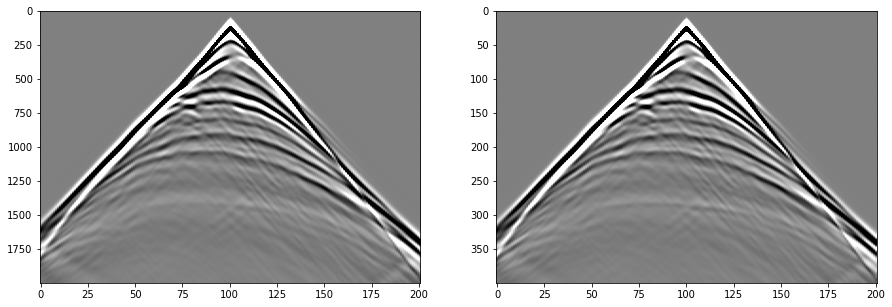

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
clip=tiro.max()/50
plt.imshow(tiro,aspect='auto',cmap='binary');plt.clim(-clip,clip)
plt.subplot(122)
plt.imshow(tiro1,aspect='auto',cmap='binary');plt.clim(-clip,clip)

(0.0, 1.0)

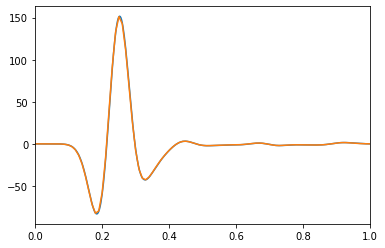

In [29]:
plt.plot(np.arange(0,amostras*dt,dt),tiro[:,100])
plt.plot(np.arange(0,amostras1*dt1,dt1),tiro1[:,100])
plt.xlim(0,1)

In [30]:
# Exemplo 3: dt de amostragem não respeitando o criterio CFL e não respeitando o teorema de Shannon
dt2=0.025
amostras2=160
wavelet2=ricker(fp,dt2,amostras2)
print('O tempo de propagação é',amostras2*dt2,'s')
print('A frequencia Nyquist é',0.5/dt2,'Hz')
print('A frequencia Máxima do sinal é',3*fp,'Hz')
print('O criterio CFL é ',cfl*1000,' ms, e o dt é',dt2*1000,'ms')

O tempo de propagação é 4.0 s
A frequencia Nyquist é 20.0 Hz
A frequencia Máxima do sinal é 18.0 Hz
O criterio CFL é  2.5515518153991437  ms, e o dt é 25.0 ms


In [31]:
tic=time.time()
tiro2=propagador(wavelet2,dt2,amostras2,soux,souz,recx,recz,vel,dx,dz,borda)
toc=time.time()
print('demorei ',toc-tic,' segundos')

A razão dt/dtp é 10 sendo dt= 25.0 ms e dtp= 2.5 ms
demorei  25.631434440612793  segundos


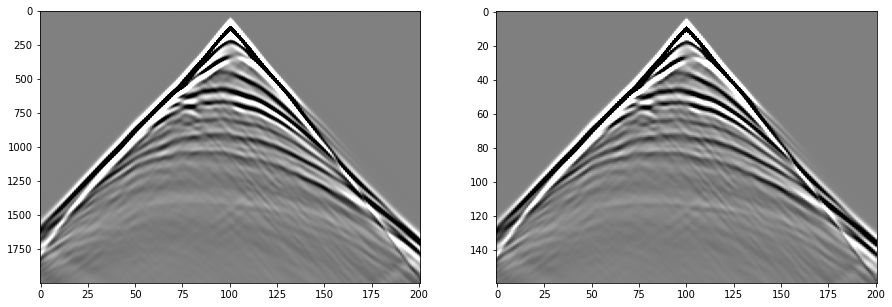

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
clip=tiro.max()/50
plt.imshow(tiro,aspect='auto',cmap='binary');plt.clim(-clip,clip)
plt.subplot(122)
plt.imshow(tiro2,aspect='auto',cmap='binary');plt.clim(-clip,clip)

(0.0, 1.0)

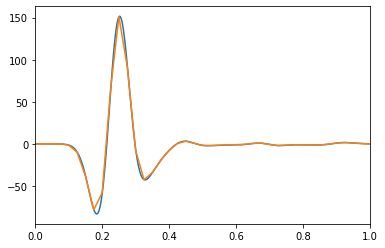

In [33]:
plt.plot(np.arange(0,amostras*dt,dt),tiro[:,100])
plt.plot(np.arange(0,amostras2*dt2,dt2),tiro2[:,100])
plt.xlim(0,1)